In [36]:
from PIL import Image

In [10]:
import cv2
from matplotlib import pyplot as plt

In [11]:
img = cv2.imread('../data/samples_images/DI0623.jpeg')

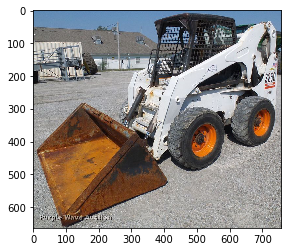

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
img.shape

(664, 758, 3)

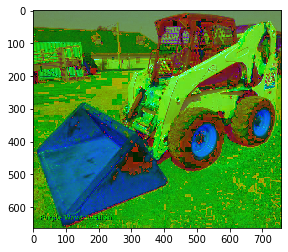

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HLS))
plt.show()

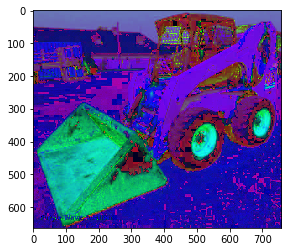

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
plt.show()

In [49]:
to_pil = transforms.ToPILImage()

In [53]:
img = Image.open('../data/samples_images/DI0623.jpeg')

In [54]:
from torchvision import models
import torch

In [55]:
vgg16 = models.vgg16(pretrained=True)
# print(vgg16)

In [56]:
alexnet = models.alexnet(pretrained=True)
# print(alexnet)

In [88]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.FiveCrop(224),
    transforms.Lambda(lambda crops: crops[2]),   # bottom-left corner crop
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])])

In [89]:
img_t = transform(img)

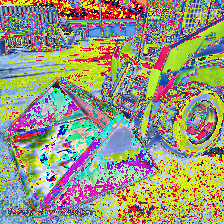

In [90]:
to_pil(img_t)

In [91]:
batch_t = torch.unsqueeze(img_t, 0)

In [93]:
batch_t.shape

torch.Size([1, 3, 224, 224])

In [95]:
vgg16.eval()
out = vgg16(batch_t)

In [97]:
out.shape

torch.Size([1, 1000])

In [103]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# Tabular Data

In [31]:
import numpy as np
import pandas as pd
data = pd.read_csv("../data/SkidSteer_2019-08.csv")

In [32]:
data.head()

,Family,Item Id,Source,item#,Product Name,Year,Make,Model,Hours Final,Winning Bid,Bucket,Engine,Tires,Transmission,Age at Sale (bin),details remaining,url,Year of Sold Date,Month of Sold Date,Day of Sold Date
0,Skid Steer Loaders,0a3f7a65-a0ab-bc52-7378-39e91c19ac47,rbauction,9644732,2007 CATERPILLAR 272C SKID STEER LOADER,2007.0,CATERPILLAR,272C,"3,938","17,000",hyd Q/C bkt,NaN,NaN,NaN,9.0,"A/C cab, aux hyd",https://www.rbauction.com/2007-CATERPILLAR--SK...,2016.0,December,2.0
1,NaN,0a5aa620-ca4a-3970-e3a9-39e91a8237aa,rbauction,10199737,2009 CATERPILLAR 272C 2 SPD HIGH FLOW SKID STE...,2009.0,CATERPILLAR,272C 2 SPD HIGH FLOW,"4,695","18,500",NaN,NaN,NaN,NaN,6.0,"canopy, aux hyd",https://www.rbauction.com/2009-CATERPILLAR--2-...,2017.0,September,22.0
2,NaN,0a6e2cb1-e01d-6a8d-720e-39e91a258018,rbauction,10323508,1999 BOBCAT 751 SKID STEER LOADER,1999.0,BOBCAT,751,"4,675","7,000",bkt,NaN,NaN,NaN,18.0,"aux hyd, cab",https://www.rbauction.com/1999-BOBCAT--SKID-ST...,2017.0,December,4.0
3,NaN,0a8f2661-c39b-ccba-66cb-39e91b739ebd,rbauction,9915815,2007 BOBCAT 463 SKID STEER LOADER,2007.0,BOBCAT,463,"2,580",6000.00,bkt,NaN,NaN,NaN,9.0,"aux hyd, canopy",https://www.rbauction.com/2007-BOBCAT--SKID-ST...,2017.0,May,10.0
4,NaN,0a9e7a7e-8e78-df9c-bf3c-39e91991aa73,rbauction,10544103,2011 CATERPILLAR 252B3 2 SPD SKID STEER LOADER,2011.0,CATERPILLAR,252B3 2 SPD,"4,047","22,000",bkt,NaN,solid tires,NaN,6.0,"A/C cab, aux hyd, joystick strg",https://www.rbauction.com/2011-CATERPILLAR--2-...,2018.0,April,24.0


In [33]:
y = data["Winning Bid"]
x1 = data["Hours Final"]
x2 = data["Age at Sale (bin)"]
x3 = data["Year"]

In [35]:
np.array(x1, dtype=float)

ValueError: could not convert string to float: '3,938'

In [24]:
X =  np.array(np.c_[y, x1, x2, x3], dtype=float)

ValueError: could not convert string to float: '17,000'

In [22]:
np.corrcoef(X)

TypeError: can only concatenate str (not "float") to str

In [36]:
import numpy as np

In [40]:
np.linalg.cholesky(np.array([[1,0.9],[0.9,1]]))

array([[1.        , 0.        ],
       [0.9       , 0.43588989]])

In [41]:
np.sqrt(1-0.81)

0.4358898943540673